### Setup inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('OK')

OK


In [2]:
years = ['2009', '2019']

def create_paths_for_many_years(years, file_base_name):
    paths = dict()
    for year in years:
        paths[year] = '{}/dados/{}.CSV'.format(year, file_base_name)
    return paths
    
def read_datasets_for_many_years(years, paths):
    dfs = dict()
    for year in years:
        dfs[year] = pd.read_csv(filepath_or_buffer=paths[year], sep='|', engine='python', encoding=encoding)
    return dfs

docente_paths = create_paths_for_many_years(years, 'SUP_DOCENTE')   

encoding='ISO-8859-1'

def get_federals(df):
    public  = df[df["TP_CATEGORIA_ADMINISTRATIVA"].isin([1])]
    return public

#ies_paths = _2019_path + 'SUP_IES_2019.CSV'
#curso_paths = _2019_path + 'SUP_CURSO_2019.CSV'
#aluno_paths = _2019_path + 'SUP_ALUNO_2019.CSV'


print(docente_paths)

{'2009': '2009/dados/SUP_DOCENTE.CSV', '2019': '2019/dados/SUP_DOCENTE.CSV'}


### Docentes

In [3]:
docentes = read_datasets_for_many_years(years, docente_paths)

In [4]:
columns = ['CO_CATEGORIA_ADMINISTRATIVA', 'CO_SITUACAO_DOCENTE', 'CO_ESCOLARIDADE_DOCENTE', 'IN_SEXO_DOCENTE', 'CO_COR_RACA_DOCENTE', 'IN_DOCENTE_DEFICIENCIA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
docentes['2009'] = docentes['2009'][columns]

In [5]:
columns = {
    'CO_CATEGORIA_ADMINISTRATIVA': 'TP_CATEGORIA_ADMINISTRATIVA', 
    'CO_SITUACAO_DOCENTE': 'TP_SITUACAO',
    'CO_ESCOLARIDADE_DOCENTE': 'TP_ESCOLARIDADE',
    'IN_SEXO_DOCENTE': 'TP_SEXO',
    'CO_COR_RACA_DOCENTE': 'TP_COR_RACA',
    'IN_DOCENTE_DEFICIENCIA': 'IN_DEFICIENCIA'
}
docentes['2009'].rename(columns=columns, inplace=True)
docentes['2009']['NU_ANO_CENSO'] = pd.Series([2009 for x in range(len(docentes['2009'].index))])

docentes['2009']['TP_CATEGORIA_ADMINISTRATIVA'] = docentes['2009']['TP_CATEGORIA_ADMINISTRATIVA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada', 5: 'Privada', 6: 'Privada'})
docentes['2009']['TP_SEXO'] = docentes['2009']['TP_SEXO'].replace({0: 'Masculino', 1: 'Feminino'})

docentes['2009'].head()

,TP_CATEGORIA_ADMINISTRATIVA,TP_SITUACAO,TP_ESCOLARIDADE,TP_SEXO,TP_COR_RACA,IN_DEFICIENCIA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,NU_ANO_CENSO
0,Federal,1,3,Masculino,1,0,0.0,0.0,2009
1,Federal,1,5,Feminino,1,0,0.0,0.0,2009
2,Federal,1,4,Feminino,1,0,0.0,0.0,2009
3,Federal,1,4,Masculino,6,0,0.0,0.0,2009
4,Federal,1,4,Masculino,0,0,0.0,0.0,2009


In [6]:
columns = ['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_SEXO', 'TP_COR_RACA', 'IN_DEFICIENCIA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
docentes['2019'] = docentes['2019'][columns]
docentes['2019']['TP_CATEGORIA_ADMINISTRATIVA'] = docentes['2019']['TP_CATEGORIA_ADMINISTRATIVA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada', 5: 'Privada', 6: 'Privada', 7: 'Especial', 8: 'Privada', 9: 'Privada'})
docentes['2019']['TP_SEXO'] = docentes['2019']['TP_SEXO'].replace({1: 'Feminino', 2: 'Masculino'})

In [7]:
df = pd.concat([docentes['2009'], docentes['2019']])
df['TP_SITUACAO'] = df['TP_SITUACAO'].replace({1: 'Em exercício', 2: 'Afastado para qualificação', 3: 'Afastado por outros motivos', 4: 'Afastado por outros motivos', 5: 'Afastado por outros motivos', 6: 'Falecido'})
df['TP_ESCOLARIDADE'] = df['TP_ESCOLARIDADE'].replace({1: 'Sem graduação', 2: 'Graduação', 3: 'Especialização', 4: 'Mestrado', 5: 'Doutorado'})
df['TP_COR_RACA'] = df['TP_COR_RACA'].replace({0: 'Não quis declarar', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação', 9: 'Não dispõe da informação'})
df['IN_DEFICIENCIA'] = df['IN_DEFICIENCIA'].replace({0: False, 1: True, 9: None})
df['IN_BOLSA_PESQUISA'] = df['IN_BOLSA_PESQUISA'].replace({0: False, 1: True})
df['IN_SUBSTITUTO'] = df['IN_SUBSTITUTO'].replace({0: False, 1: True})

df.head()

,TP_CATEGORIA_ADMINISTRATIVA,TP_SITUACAO,TP_ESCOLARIDADE,TP_SEXO,TP_COR_RACA,IN_DEFICIENCIA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,NU_ANO_CENSO
0,Federal,Em exercício,Especialização,Masculino,Branca,False,False,False,2009
1,Federal,Em exercício,Doutorado,Feminino,Branca,False,False,False,2009
2,Federal,Em exercício,Mestrado,Feminino,Branca,False,False,False,2009
3,Federal,Em exercício,Mestrado,Masculino,Não dispõe da informação,False,False,False,2009
4,Federal,Em exercício,Mestrado,Masculino,Não quis declarar,False,False,False,2009


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758517 entries, 0 to 399427
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   TP_CATEGORIA_ADMINISTRATIVA  758517 non-null  object
 1   TP_SITUACAO                  758517 non-null  object
 2   TP_ESCOLARIDADE              758517 non-null  object
 3   TP_SEXO                      758517 non-null  object
 4   TP_COR_RACA                  758517 non-null  object
 5   IN_DEFICIENCIA               715141 non-null  object
 6   IN_BOLSA_PESQUISA            470661 non-null  object
 7   IN_SUBSTITUTO                734072 non-null  object
 8   NU_ANO_CENSO                 758517 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 57.9+ MB


In [9]:
df.isna().sum()

TP_CATEGORIA_ADMINISTRATIVA         0
TP_SITUACAO                         0
TP_ESCOLARIDADE                     0
TP_SEXO                             0
TP_COR_RACA                         0
IN_DEFICIENCIA                  43376
IN_BOLSA_PESQUISA              287856
IN_SUBSTITUTO                   24445
NU_ANO_CENSO                        0
dtype: int64

Quantos são os docentes de cada categoria administrativa?

In [46]:
quantity_by_race_and_year_df = df[(df['TP_SITUACAO'] == 'Em exercício') & (df['TP_COR_RACA'] != 'Não dispõe da informação') & (df['TP_COR_RACA'] != 'Não quis declarar')].groupby(['NU_ANO_CENSO', 'TP_COR_RACA']).size().reset_index(name='Quantidade')
total_by_year = quantity_by_race_and_year_df.groupby('NU_ANO_CENSO')['Quantidade'].sum()

quantity_by_race_and_year_df = quantity_by_race_and_year_df.merge(total_by_year, on='NU_ANO_CENSO', suffixes=('', '_total'))
quantity_by_race_and_year_df['Porcentagem'] = (quantity_by_race_and_year_df['Quantidade'] / quantity_by_race_and_year_df['Quantidade_total'] * 100).round(2)
quantity_by_race_and_year_df = quantity_by_race_and_year_df.drop('Quantidade_total', axis=1)
quantity_by_race_and_year_df

,NU_ANO_CENSO,TP_COR_RACA,Quantidade,Porcentagem
0,2009,Amarela,2607,1.26
1,2009,Branca,166797,80.89
2,2009,Indígena,443,0.21
3,2009,Parda,32293,15.66
4,2009,Preta,4057,1.97
5,2019,Amarela,3941,1.44
6,2019,Branca,204072,74.76
7,2019,Indígena,494,0.18
8,2019,Parda,56662,20.76
9,2019,Preta,7816,2.86


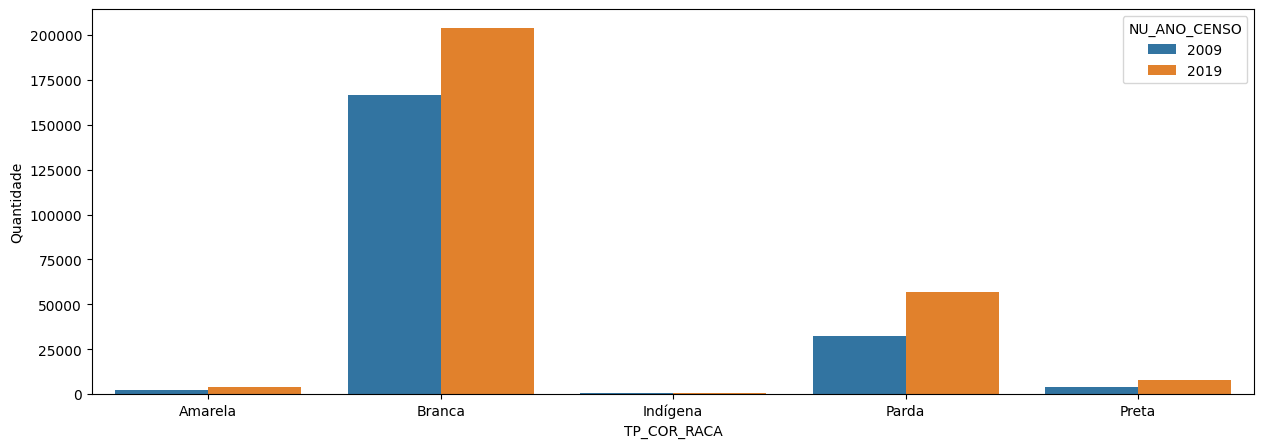

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="TP_COR_RACA", y="Quantidade", hue="NU_ANO_CENSO", data=quantity_by_race_and_year_df)
plt.show()

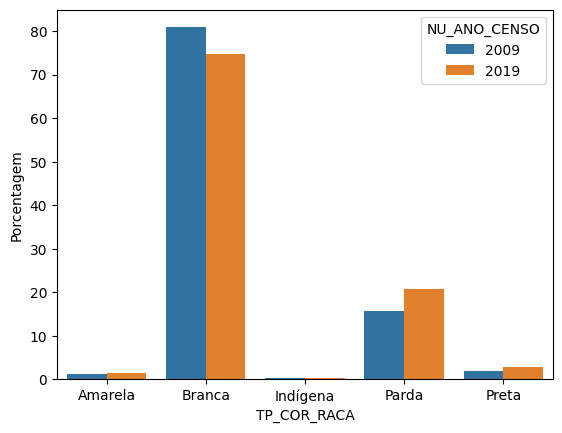

In [40]:
sns.barplot(x="TP_COR_RACA", y="Porcentagem", hue="NU_ANO_CENSO", data=quantity_by_race_and_year_df)
plt.show()

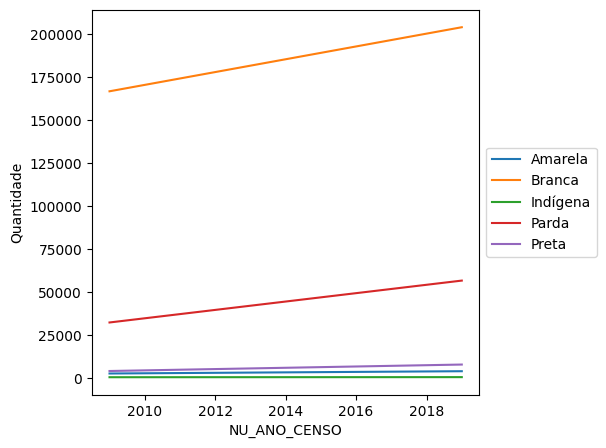

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(x="NU_ANO_CENSO", y="Quantidade", hue="TP_COR_RACA", data=quantity_by_race_and_year_df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

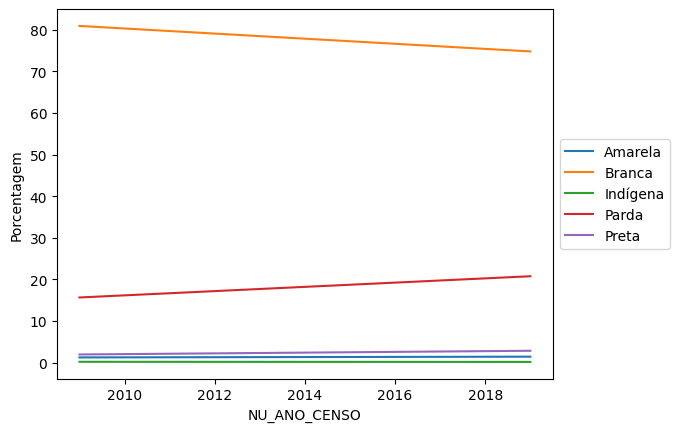

In [41]:
sns.lineplot(x="NU_ANO_CENSO", y="Porcentagem", hue="TP_COR_RACA", data=quantity_by_race_and_year_df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

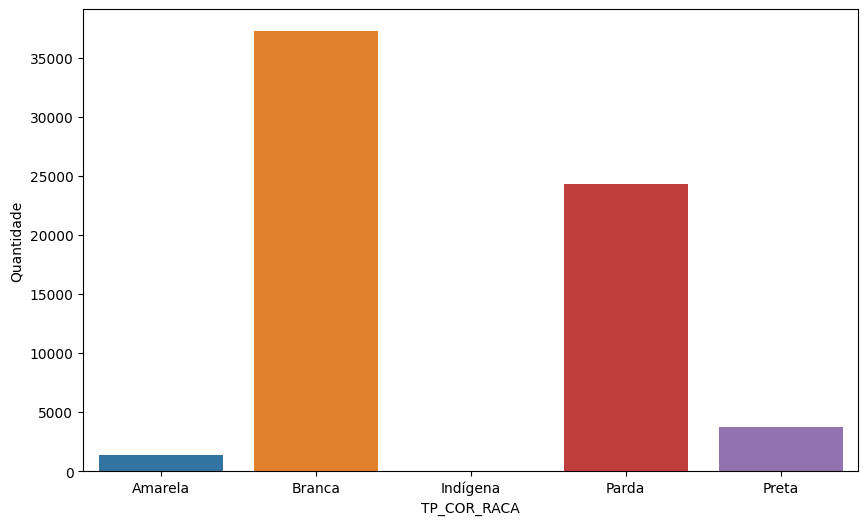

In [55]:
year_race_quantity = quantity_by_race_and_year_df.groupby(['TP_COR_RACA', 'NU_ANO_CENSO'])['Quantidade'].sum()
year_race_quantity
evolution = year_race_quantity.unstack().diff(axis=1).iloc[:, -1]

evolution_df = evolution.reset_index(name='Quantidade').sort_values('TP_COR_RACA')
plt.figure(figsize=(10, 6))
sns.barplot(x='TP_COR_RACA', y='Quantidade', data=evolution_df)
plt.show()

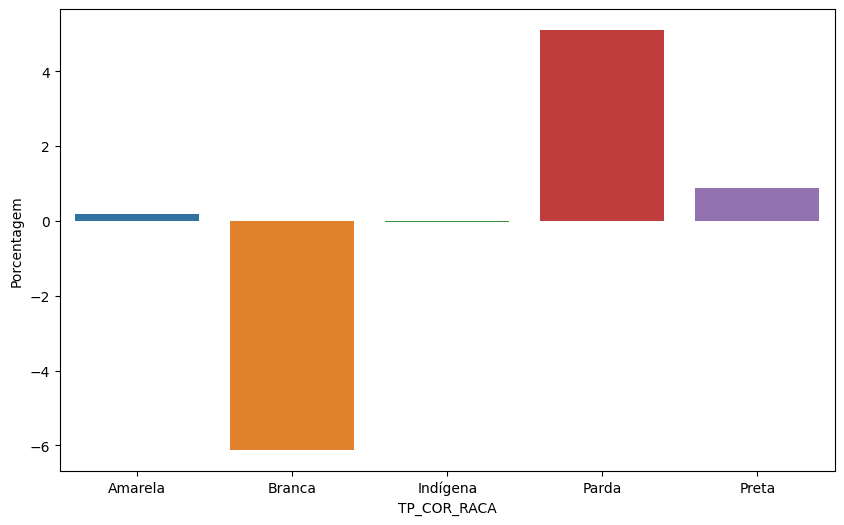

In [57]:
year_race_quantity = quantity_by_race_and_year_df.groupby(['TP_COR_RACA', 'NU_ANO_CENSO'])['Porcentagem'].sum()
year_race_quantity
evolution = year_race_quantity.unstack().diff(axis=1).iloc[:, -1]

evolution_df = evolution.reset_index(name='Porcentagem').sort_values('TP_COR_RACA')
plt.figure(figsize=(10, 6))
sns.barplot(x='TP_COR_RACA', y='Porcentagem', data=evolution_df)
plt.show()